## Case 1 ##

!! Primeiro case para o processo trainee da liga financeira QFC UFBA.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

* Criação de listas e DataFrames

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tesouros = ['prefixado_2023_1','prefixado_2023_2','prefixado_2023_cupom']
valores = [3000,1000,2500]
taxas = [14.82,17.75,15.25]
cupom = [0, 0, 2824.0625]

In [3]:
lista = pd.DataFrame(list(zip(valores,taxas,cupom)), index=[tesouros], columns=['valores','taxas','cupom'] )

In [4]:
lista

,valores,taxas,cupom
prefixado_2023_1,3000,14.82,0.0000
prefixado_2023_2,1000,17.75,0.0000
prefixado_2023_cupom,2500,15.25,2824.0625


In [5]:
cdb = {'bb':8.70,
       'santander':7.62,
       'safra':6.9,
       'itau':7.7}

---------------------------------------------

* Aplicações 

------------------

CDB :

In [6]:
capital=10000 # R$
ir=15 # %
investimentos=[]
montantes_cdb=[]
retorno_semestral=[]

In [7]:
for a in cdb.keys():
    zero=0
    investimentos.append(a)
    retorno_semestral.append(zero)
for b in cdb.values():
    inc=capital                              # inc = 10000
    for c in range(2):                       # repetição por 2 anos
        x = inc * (1+(b/100))                # multiplicação do capital pela taxa^anos = montante = x                 
        inc = x                              # novo capital é inc
        if(c==1):                            # põe na lista apenas após o 2° ano de aplicação
            x = capital + (x-capital)*(1-(ir/100))     # subtração do lucro pelo imposto de renda
            montantes_cdb.append(round(x,4)) 
        

In [8]:
montantes_cdb

[11543.3365, 11344.7547, 11213.4685, 11359.3965]

***********

Tesouro prefixado:

In [9]:
montantes_pre=[]
for xis in range(len(tesouros)):
    investimentos.append(tesouros[xis])

In [10]:
for a in range(len(lista)):
    num = int(capital/lista.iloc[a][0])                        # num = quantidade de ações que João pode comprar
    c= num * lista.iloc[a][0] * (1 + (lista.iloc[a][1]/100))   # multiplicação de num * valor unitário * taxa
    
    resto=capital % (num*lista.iloc[a][0])
                                                      # soma do montante com o resto que não foi investido
    c = num * lista.iloc[a][0] + ((c-(num * lista.iloc[a][0]))*(1-(ir/100)))                  # c = montante - lucro*1-ir (subtração do IR)
    c=c+resto                           
    montantes_pre.append(c)
    if(lista.iloc[a][2]==0):                                   # se houver cupom semestral, monstrar recebimento semestral 
        retorno_semestral.append(0)
    else:
        retorno_semestral.append(round((c/4),3))

-----------

* Resultados

In [11]:
montantes_finais=montantes_cdb+montantes_pre

In [12]:
pdfinal = pd.DataFrame(list(zip(investimentos,montantes_finais,retorno_semestral)), columns=['Investimentos','Montante','Retorno semestral'])

In [13]:
pdfinal


,Investimentos,Montante,Retorno semestral
0,bb,11543.3365,0.000
1,santander,11344.7547,0.000
2,safra,11213.4685,0.000
3,itau,11359.3965,0.000
4,prefixado_2023_1,11133.7300,0.000
5,prefixado_2023_2,11508.7500,0.000
6,prefixado_2023_cupom,11296.2500,2824.062


In [14]:
lucros_fim=[]
for y in montantes_finais:
    lucros_fim.append(y-10000)
anos=[2021,2022,2023]    

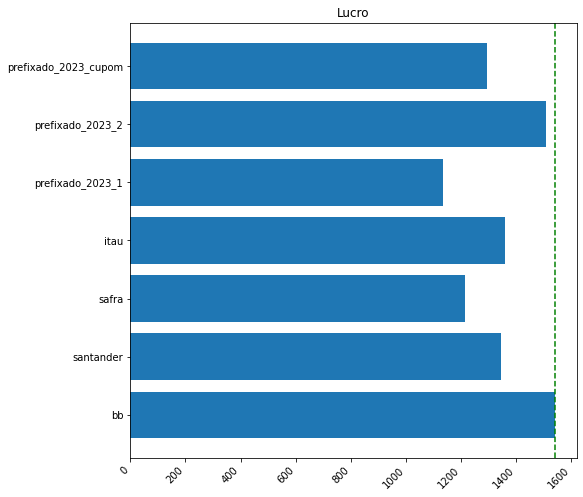

In [15]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.barh(investimentos,lucros_fim)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.axvline(max(lucros_fim), ls='--', color='g')
ax.set_title('Lucro')
plt.show()